<a href="https://colab.research.google.com/github/JeffreyDiPerna/Human_Movement_Classifier/blob/main/Transfer_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mounted at /content/gdrive
Epoch [1/8], Loss: 1.3232, Acc: 0.7476, Prec: 0.7490, Rec: 0.7457, F1: 0.7438
Epoch [2/8], Loss: 0.7612, Acc: 0.8701, Prec: 0.8734, Rec: 0.8694, F1: 0.8707
Epoch [3/8], Loss: 0.5498, Acc: 0.9021, Prec: 0.9073, Rec: 0.9010, F1: 0.9013
Epoch [4/8], Loss: 0.3984, Acc: 0.9190, Prec: 0.9202, Rec: 0.9204, F1: 0.9200
Epoch [5/8], Loss: 0.3935, Acc: 0.9435, Prec: 0.9446, Rec: 0.9439, F1: 0.9441
Epoch [6/8], Loss: 0.2779, Acc: 0.9548, Prec: 0.9571, Rec: 0.9544, F1: 0.9554
Epoch [7/8], Loss: 0.2205, Acc: 0.9680, Prec: 0.9692, Rec: 0.9677, F1: 0.9683
Epoch [8/8], Loss: 0.1966, Acc: 0.9529, Prec: 0.9554, Rec: 0.9520, F1: 0.9532


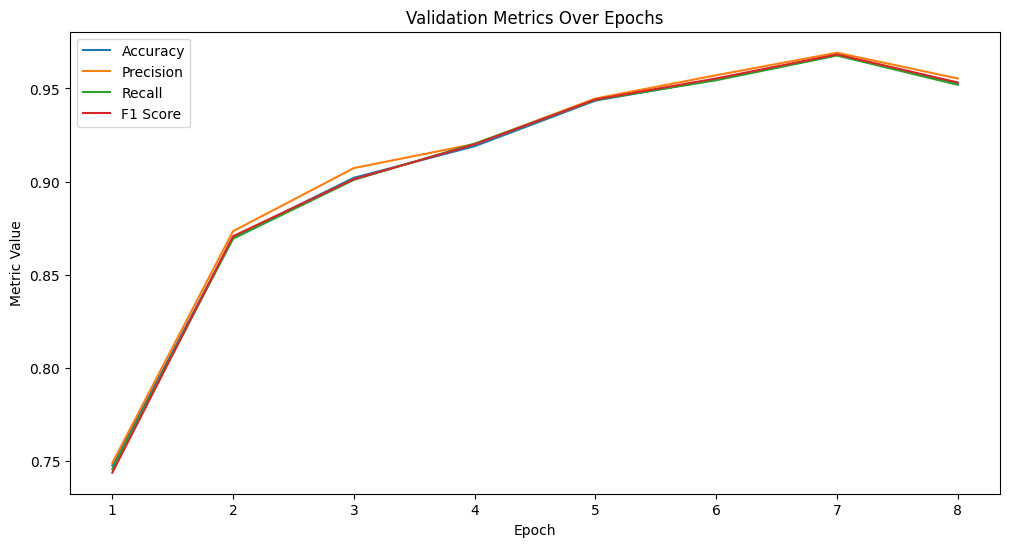

Validation Accuracy: 0.9529
Validation Precision: 0.9554
Validation Recall: 0.9520
Validation F1 Score: 0.9532
Test Accuracy: 0.5714
Test Precision: 0.6020
Test Recall: 0.5731
Test F1: 0.5811

Classification Report for Test Set:
              precision    recall  f1-score   support

           0     0.5000    0.5556    0.5263         9
           1     0.5000    0.6000    0.5455        10
           2     0.5556    0.5556    0.5556         9
           3     1.0000    0.7000    0.8235        10
           4     0.4545    0.4545    0.4545        11

    accuracy                         0.5714        49
   macro avg     0.6020    0.5731    0.5811        49
weighted avg     0.6020    0.5714    0.5801        49



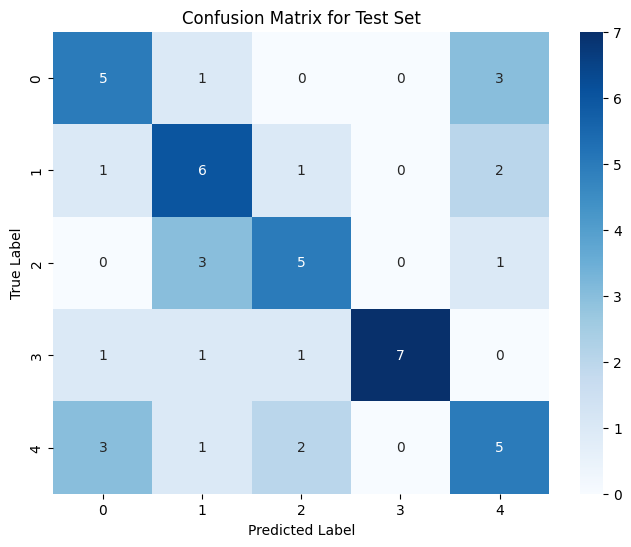

In [ ]:
# import torch
# import torch.nn as nn
# import torch.optim as optim
# import torchvision.models as models
# import torchvision.transforms as transforms
# import os
# import numpy as np
# import pandas as pd
# import cv2
# import matplotlib.pyplot as plt
# import seaborn as sns
# from collections import Counter
# from google.colab import drive
# from torch.utils.data import Dataset, DataLoader
# from PIL import Image
# from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# # Mount Google Drive
# drive.mount('/content/gdrive', force_remount=True)

# # Define dataset paths
# train_video_path = "/content/gdrive/MyDrive/ASL_QMIND_2024_2025/Frames/Train_1/"
# test_video_path = "/content/gdrive/MyDrive/ASL_QMIND_2024_2025/Frames/Test_1/"

# # Load train and test dataframes
# train_df = pd.read_csv('/content/gdrive/MyDrive/ASL_QMIND_2024_2025/new_train_labels.csv')
# test_df = pd.read_csv('/content/gdrive/MyDrive/ASL_QMIND_2024_2025/new_test_labels.csv')

# # Define image transformations with stronger augmentations
# transform = transforms.Compose([
#     transforms.RandomResizedCrop(112, scale=(0.8, 1.2)),
#     transforms.RandomHorizontalFlip(),
#     transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1),
#     transforms.RandomAffine(degrees=10, translate=(0.1, 0.1)),
#     transforms.ToTensor(),
#     transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
# ])

# class SignLanguageDataset(Dataset):
#     def __init__(self, video_path, dataframe, transform=None):
#         self.video_path = video_path
#         self.dataframe = dataframe
#         self.transform = transform
#         self.image_paths = []
#         self.labels_list = []
#         video_label_map = {row["video_name"].replace(".mp4", ""): row["tag"] for _, row in dataframe.iterrows()}

#         for vid_name, label in video_label_map.items():
#             vid_folder = os.path.join(video_path, vid_name)
#             if os.path.exists(vid_folder):
#                 frames = sorted([f for f in os.listdir(vid_folder) if os.path.isfile(os.path.join(vid_folder, f))])
#                 for frame in frames:
#                     frame_prefix = frame.split(".")[0]
#                     if frame_prefix == vid_name:
#                         self.image_paths.append(os.path.join(vid_folder, frame))
#                         self.labels_list.append(label)

#     def __len__(self):
#         return len(self.image_paths)

#     def __getitem__(self, idx):
#         img_path = self.image_paths[idx]
#         image = Image.open(img_path).convert("RGB")
#         label = self.labels_list[idx]
#         if self.transform:
#             image = self.transform(image)
#         return image, label

# # Load datasets
# train_dataset = SignLanguageDataset(train_video_path, train_df, transform=transform)
# test_dataset = SignLanguageDataset(test_video_path, test_df, transform=transform)

# # Split training dataset for validation
# train_size = int(0.8 * len(train_dataset))
# val_size = len(train_dataset) - train_size
# train_dataset, val_dataset = torch.utils.data.random_split(train_dataset, [train_size, val_size])

# # Create DataLoaders
# train_loader = DataLoader(train_dataset, batch_size=8, shuffle=True)
# val_loader = DataLoader(val_dataset, batch_size=8, shuffle=False)
# test_loader = DataLoader(test_dataset, batch_size=1, shuffle=False)

# # Load Pretrained ResNet50 with more fine-tuning
# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# model = models.resnet50(weights=models.ResNet50_Weights.IMAGENET1K_V1)

# for param in model.parameters():
#     param.requires_grad = False  # Freeze all layers

# # Unfreeze last 4 layers for deeper fine-tuning
# for param in list(model.parameters())[-40:]:
#     param.requires_grad = True

# num_classes = 5
# model.fc = nn.Sequential(
#     nn.Linear(model.fc.in_features, 512),
#     nn.ReLU(),
#     nn.Dropout(0.5),
#     nn.Linear(512, num_classes)
# )

# model = model.to(device)

# # Define optimizer, scheduler, and loss function
# criterion = nn.CrossEntropyLoss()
# optimizer = torch.optim.Adam(model.parameters(), lr=5e-5)
# scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.5)

# # Training loop
# num_epochs = 8
# train_losses, val_accuracies, val_precisions, val_recalls, val_f1s = [], [], [], [], []

# for epoch in range(num_epochs):
#     model.train()
#     running_loss = 0.0
#     for images, labels in train_loader:
#         images, labels = images.to(device), labels.to(device)
#         optimizer.zero_grad()
#         outputs = model(images)
#         loss = criterion(outputs, labels)
#         loss.backward()
#         optimizer.step()
#         running_loss += loss.item()
#     train_losses.append(running_loss / len(train_loader))
#     scheduler.step()

#     # Validation
#     model.eval()
#     y_true, y_pred = [], []
#     with torch.no_grad():
#         for images, labels in val_loader:
#             images, labels = images.to(device), labels.to(device)
#             outputs = model(images)
#             preds = torch.argmax(outputs, dim=1)
#             y_true.extend(labels.cpu().numpy())
#             y_pred.extend(preds.cpu().numpy())

#     accuracy = accuracy_score(y_true, y_pred)
#     precision = precision_score(y_true, y_pred, average='macro')
#     recall = recall_score(y_true, y_pred, average='macro')
#     f1 = f1_score(y_true, y_pred, average='macro')

#     val_accuracies.append(accuracy)
#     val_precisions.append(precision)
#     val_recalls.append(recall)
#     val_f1s.append(f1)

#     print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {train_losses[-1]:.4f}, Acc: {accuracy:.4f}, Prec: {precision:.4f}, Rec: {recall:.4f}, F1: {f1:.4f}")

# # Plot validation metrics
# plt.figure(figsize=(12,6))
# plt.plot(range(1, num_epochs+1), val_accuracies, label="Accuracy")
# plt.plot(range(1, num_epochs+1), val_precisions, label="Precision")
# plt.plot(range(1, num_epochs+1), val_recalls, label="Recall")
# plt.plot(range(1, num_epochs+1), val_f1s, label="F1 Score")
# plt.xlabel("Epoch")
# plt.ylabel("Metric Value")
# plt.legend()
# plt.title("Validation Metrics Over Epochs")
# plt.show()


# print(f"Validation Accuracy: {val_accuracies[-1]:.4f}")
# print(f"Validation Precision: {val_precisions[-1]:.4f}")
# print(f"Validation Recall: {val_recalls[-1]:.4f}")
# print(f"Validation F1 Score: {val_f1s[-1]:.4f}")

# # Testing with majority voting (fix)
# predictions_by_video = {}
# y_true_by_video = {}

# with torch.no_grad():
#     for img_path, (images, labels) in zip(test_dataset.image_paths, test_loader):
#         images, labels = images.to(device), labels.to(device)
#         output = model(images)
#         pred = torch.argmax(output, dim=1).item()

#         # Extract video name from frame path
#         video_name = os.path.basename(img_path).split("_")[0]  # Extract "1.mp4" from "1.mp4_frame1.jpg"

#         if video_name not in predictions_by_video:
#             predictions_by_video[video_name] = []
#             y_true_by_video[video_name] = labels.item()

#         predictions_by_video[video_name].append(pred)

# # Compute majority voting per video
# final_predictions = {
#     video: Counter(preds).most_common(1)[0][0]  # More stable majority vote
#     for video, preds in predictions_by_video.items()
# }

# # Convert to NumPy arrays for safer evaluation
# y_true_videos = np.array(list(y_true_by_video.values()))
# y_pred_videos = np.array(list(final_predictions.values()))

# # Compute Test Metrics
# test_accuracy = accuracy_score(y_true_videos, y_pred_videos)
# test_precision = precision_score(y_true_videos, y_pred_videos, average='macro')
# test_recall = recall_score(y_true_videos, y_pred_videos, average='macro')
# test_f1 = f1_score(y_true_videos, y_pred_videos, average='macro')

# # Print metrics
# print(f"Test Accuracy: {test_accuracy:.4f}")
# print(f"Test Precision: {test_precision:.4f}")
# print(f"Test Recall: {test_recall:.4f}")
# print(f"Test F1: {test_f1:.4f}")

# # Print detailed class-wise metrics
# from sklearn.metrics import classification_report
# print("\nClassification Report for Test Set:")
# print(classification_report(y_true_videos, y_pred_videos, digits=4))

# # Compute and Plot Confusion Matrix
# conf_matrix = confusion_matrix(y_true_videos, y_pred_videos)
# unique_labels = sorted(set(y_true_videos) | set(y_pred_videos))  # Ensure correct axis labels

# plt.figure(figsize=(8,6))
# sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
#             xticklabels=unique_labels, yticklabels=unique_labels)
# plt.xlabel("Predicted Label")
# plt.ylabel("True Label")
# plt.title("Confusion Matrix for Test Set")
# plt.show()

# # Free memory
# torch.cuda.empty_cache()



In [ ]:
# import torch
# import torch.nn as nn
# import torch.optim as optim
# import torchvision.models as models
# import torchvision.transforms as transforms
# import os
# import numpy as np
# import pandas as pd
# import cv2
# import matplotlib.pyplot as plt
# import seaborn as sns
# from collections import Counter
# from google.colab import drive
# from torch.utils.data import Dataset, DataLoader
# from PIL import Image
# from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# # Mount Google Drive
# drive.mount('/content/gdrive', force_remount=True)

# # Define dataset paths
# train_video_path = "/content/gdrive/MyDrive/ASL_QMIND_2024_2025/Frames/Train_1/"
# test_video_path = "/content/gdrive/MyDrive/ASL_QMIND_2024_2025/Frames/Test_1/"

# # Load train and test dataframes
# train_df = pd.read_csv('/content/gdrive/MyDrive/ASL_QMIND_2024_2025/new_train_labels.csv')
# test_df = pd.read_csv('/content/gdrive/MyDrive/ASL_QMIND_2024_2025/new_test_labels.csv')

# # Define base image transformations
# def get_transform(label=None):
#     base_transform = transforms.Compose([
#         transforms.RandomResizedCrop(112, scale=(0.8, 1.2)),
#         transforms.RandomHorizontalFlip(),
#         transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1),
#         transforms.RandomAffine(degrees=10, translate=(0.1, 0.1)),
#         transforms.ToTensor(),
#         transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
#     ])

#     extra_augmentation = transforms.Compose([
#         transforms.RandomRotation(20),
#         transforms.RandomResizedCrop(112, scale=(0.7, 1.3)),
#         transforms.RandomHorizontalFlip(),
#         transforms.ColorJitter(brightness=0.3, contrast=0.3),
#         transforms.ToTensor(),
#         transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
#     ])

#     if label in [4]:  # Apply stronger augmentation for confused classes
#         return extra_augmentation
#     else:
#         return base_transform

# class SignLanguageDataset(Dataset):
#     def __init__(self, video_path, dataframe):
#         self.video_path = video_path
#         self.dataframe = dataframe
#         self.image_paths = []
#         self.labels_list = []
#         self.transforms_list = []

#         video_label_map = {row["video_name"].replace(".mp4", ""): row["tag"] for _, row in dataframe.iterrows()}

#         for vid_name, label in video_label_map.items():
#             vid_folder = os.path.join(video_path, vid_name)
#             if os.path.exists(vid_folder):
#                 frames = sorted([f for f in os.listdir(vid_folder) if os.path.isfile(os.path.join(vid_folder, f))])
#                 for frame in frames:
#                     frame_prefix = frame.split(".")[0]
#                     if frame_prefix == vid_name:
#                         self.image_paths.append(os.path.join(vid_folder, frame))
#                         self.labels_list.append(label)
#                         self.transforms_list.append(get_transform(label))

#     def __len__(self):
#         return len(self.image_paths)

#     def __getitem__(self, idx):
#         img_path = self.image_paths[idx]
#         image = Image.open(img_path).convert("RGB")
#         label = self.labels_list[idx]
#         transform = self.transforms_list[idx]
#         image = transform(image)
#         return image, label

# # Load datasets
# train_dataset = SignLanguageDataset(train_video_path, train_df)
# test_dataset = SignLanguageDataset(test_video_path, test_df)

# # Split training dataset for validation
# train_size = int(0.8 * len(train_dataset))
# val_size = len(train_dataset) - train_size
# train_dataset, val_dataset = torch.utils.data.random_split(train_dataset, [train_size, val_size])

# # Create DataLoaders
# train_loader = DataLoader(train_dataset, batch_size=8, shuffle=True)
# val_loader = DataLoader(val_dataset, batch_size=8, shuffle=False)
# test_loader = DataLoader(test_dataset, batch_size=1, shuffle=False)


# # Load Pretrained ResNet50 with more fine-tuning
# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# model = models.resnet50(weights=models.ResNet50_Weights.IMAGENET1K_V1)

# for param in model.parameters():
#     param.requires_grad = False  # Freeze all layers

# # Unfreeze last 4 layers for deeper fine-tuning
# for param in list(model.parameters())[-40:]:
#     param.requires_grad = True

# num_classes = 5
# model.fc = nn.Sequential(
#     nn.Linear(model.fc.in_features, 512),
#     nn.ReLU(),
#     nn.Dropout(0.5),
#     nn.Linear(512, num_classes)
# )

# model = model.to(device)

# # Define optimizer, scheduler, and loss function
# criterion = nn.CrossEntropyLoss()
# optimizer = torch.optim.Adam(model.parameters(), lr=5e-5)
# scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.5)

# # Training loop
# num_epochs = 8
# train_losses, val_accuracies, val_precisions, val_recalls, val_f1s = [], [], [], [], []

# for epoch in range(num_epochs):
#     model.train()
#     running_loss = 0.0
#     for images, labels in train_loader:
#         images, labels = images.to(device), labels.to(device)
#         optimizer.zero_grad()
#         outputs = model(images)
#         loss = criterion(outputs, labels)
#         loss.backward()
#         optimizer.step()
#         running_loss += loss.item()
#     train_losses.append(running_loss / len(train_loader))
#     scheduler.step()

#     # Validation
#     model.eval()
#     y_true, y_pred = [], []
#     with torch.no_grad():
#         for images, labels in val_loader:
#             images, labels = images.to(device), labels.to(device)
#             outputs = model(images)
#             preds = torch.argmax(outputs, dim=1)
#             y_true.extend(labels.cpu().numpy())
#             y_pred.extend(preds.cpu().numpy())

#     accuracy = accuracy_score(y_true, y_pred)
#     precision = precision_score(y_true, y_pred, average='macro')
#     recall = recall_score(y_true, y_pred, average='macro')
#     f1 = f1_score(y_true, y_pred, average='macro')

#     val_accuracies.append(accuracy)
#     val_precisions.append(precision)
#     val_recalls.append(recall)
#     val_f1s.append(f1)

#     print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {train_losses[-1]:.4f}, Acc: {accuracy:.4f}, Prec: {precision:.4f}, Rec: {recall:.4f}, F1: {f1:.4f}")

# # Plot validation metrics
# plt.figure(figsize=(12,6))
# plt.plot(range(1, num_epochs+1), val_accuracies, label="Accuracy")
# plt.plot(range(1, num_epochs+1), val_precisions, label="Precision")
# plt.plot(range(1, num_epochs+1), val_recalls, label="Recall")
# plt.plot(range(1, num_epochs+1), val_f1s, label="F1 Score")
# plt.xlabel("Epoch")
# plt.ylabel("Metric Value")
# plt.legend()
# plt.title("Validation Metrics Over Epochs")
# plt.show()


# print(f"Validation Accuracy: {val_accuracies[-1]:.4f}")
# print(f"Validation Precision: {val_precisions[-1]:.4f}")
# print(f"Validation Recall: {val_recalls[-1]:.4f}")
# print(f"Validation F1 Score: {val_f1s[-1]:.4f}")

# # Define path to save model in Google Drive
# model_save_path = "/content/gdrive/MyDrive/ASL_QMIND_2024_2025/saved_model_resnet.pth"

# # Save model state_dict
# torch.save(model.state_dict(), model_save_path)

# print(f"Model saved to {model_save_path}")

# # Testing with majority voting (fix)
# predictions_by_video = {}
# y_true_by_video = {}

# with torch.no_grad():
#     for img_path, (images, labels) in zip(test_dataset.image_paths, test_loader):
#         images, labels = images.to(device), labels.to(device)
#         output = model(images)
#         pred = torch.argmax(output, dim=1).item()

#         # Extract video name from frame path
#         video_name = os.path.basename(img_path).split("_")[0]  # Extract "1.mp4" from "1.mp4_frame1.jpg"

#         if video_name not in predictions_by_video:
#             predictions_by_video[video_name] = []
#             y_true_by_video[video_name] = labels.item()

#         predictions_by_video[video_name].append(pred)

# # Compute majority voting per video
# final_predictions = {
#     video: Counter(preds).most_common(1)[0][0]  # More stable majority vote
#     for video, preds in predictions_by_video.items()
# }

# # Convert to NumPy arrays for safer evaluation
# y_true_videos = np.array(list(y_true_by_video.values()))
# y_pred_videos = np.array(list(final_predictions.values()))

# # Compute Test Metrics
# test_accuracy = accuracy_score(y_true_videos, y_pred_videos)
# test_precision = precision_score(y_true_videos, y_pred_videos, average='macro')
# test_recall = recall_score(y_true_videos, y_pred_videos, average='macro')
# test_f1 = f1_score(y_true_videos, y_pred_videos, average='macro')

# # Print metrics
# print(f"Test Accuracy: {test_accuracy:.4f}")
# print(f"Test Precision: {test_precision:.4f}")
# print(f"Test Recall: {test_recall:.4f}")
# print(f"Test F1: {test_f1:.4f}")

# # Print detailed class-wise metrics
# from sklearn.metrics import classification_report
# print("\nClassification Report for Test Set:")
# print(classification_report(y_true_videos, y_pred_videos, digits=4))

# # Compute and Plot Confusion Matrix
# conf_matrix = confusion_matrix(y_true_videos, y_pred_videos)
# unique_labels = sorted(set(y_true_videos) | set(y_pred_videos))  # Ensure correct axis labels

# plt.figure(figsize=(8,6))
# sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
#             xticklabels=unique_labels, yticklabels=unique_labels)
# plt.xlabel("Predicted Label")
# plt.ylabel("True Label")
# plt.title("Confusion Matrix for Test Set")
# plt.show()

# # Free memory
# torch.cuda.empty_cache()



Mounted at /content/gdrive


Downloading: "https://download.pytorch.org/models/inception_v3_google-0cc3c7bd.pth" to /root/.cache/torch/hub/checkpoints/inception_v3_google-0cc3c7bd.pth
100%|██████████| 104M/104M [00:02<00:00, 42.0MB/s]


RuntimeError: Calculated padded input size per channel: (1 x 1). Kernel size: (5 x 5). Kernel size can't be greater than actual input size

In [ ]:
# print(f"Validation Accuracy: {val_accuracies[-1]:.4f}")
# print(f"Validation Precision: {val_precisions[-1]:.4f}")
# print(f"Validation Recall: {val_recalls[-1]:.4f}")
# print(f"Validation F1 Score: {val_f1s[-1]:.4f}")


# # Testing with majority voting (fix)
# predictions_by_video = {}
# y_true_by_video = {}

# with torch.no_grad():
#     for img_path, (images, labels) in zip(test_dataset.image_paths, test_loader):
#         images, labels = images.to(device), labels.to(device)
#         output = model(images)
#         pred = torch.argmax(output, dim=1).item()

#         # Extract video name from frame path
#         video_name = os.path.basename(img_path).split("_")[0]  # Extract "1.mp4" from "1.mp4_frame1.jpg"

#         if video_name not in predictions_by_video:
#             predictions_by_video[video_name] = []
#             y_true_by_video[video_name] = labels.item()

#         predictions_by_video[video_name].append(pred)

# # Apply majority voting per video
# final_predictions = {
#     video: max(set(preds), key=preds.count)  # Still majority voting, but ensuring stability
#     for video, preds in predictions_by_video.items()
# }
# y_true_videos = list(y_true_by_video.values())
# y_pred_videos = list(final_predictions.values())

# # Compute Test Metrics
# test_accuracy = accuracy_score(y_true_videos, y_pred_videos)
# test_precision = precision_score(y_true_videos, y_pred_videos, average='macro')
# test_recall = recall_score(y_true_videos, y_pred_videos, average='macro')

# print(f"Test Accuracy: {test_accuracy:.4f}")
# print(f"Test Precision: {test_precision:.4f}")
# print(f"Test Recall: {test_recall:.4f}")


# # Free memory
# torch.cuda.empty_cache()

Validation Accuracy: 0.7401
Validation Precision: 0.7511
Validation Recall: 0.7382
Validation F1 Score: 0.7384


KeyboardInterrupt: 

Mounted at /content/gdrive
Epoch [1/8], Loss: 1.4664, Acc: 0.6742, Prec: 0.6883, Rec: 0.6748, F1: 0.6658
Epoch [2/8], Loss: 0.8955, Acc: 0.8512, Prec: 0.8518, Rec: 0.8555, F1: 0.8530
Epoch [3/8], Loss: 0.5147, Acc: 0.9190, Prec: 0.9218, Rec: 0.9175, F1: 0.9189
Epoch [4/8], Loss: 0.3548, Acc: 0.9266, Prec: 0.9359, Rec: 0.9261, F1: 0.9289
Epoch [5/8], Loss: 0.2862, Acc: 0.9623, Prec: 0.9650, Rec: 0.9624, F1: 0.9634
Epoch [6/8], Loss: 0.2409, Acc: 0.9661, Prec: 0.9678, Rec: 0.9663, F1: 0.9669
Epoch [7/8], Loss: 0.1853, Acc: 0.9680, Prec: 0.9684, Rec: 0.9671, F1: 0.9676
Epoch [8/8], Loss: 0.1827, Acc: 0.9623, Prec: 0.9629, Rec: 0.9622, F1: 0.9623


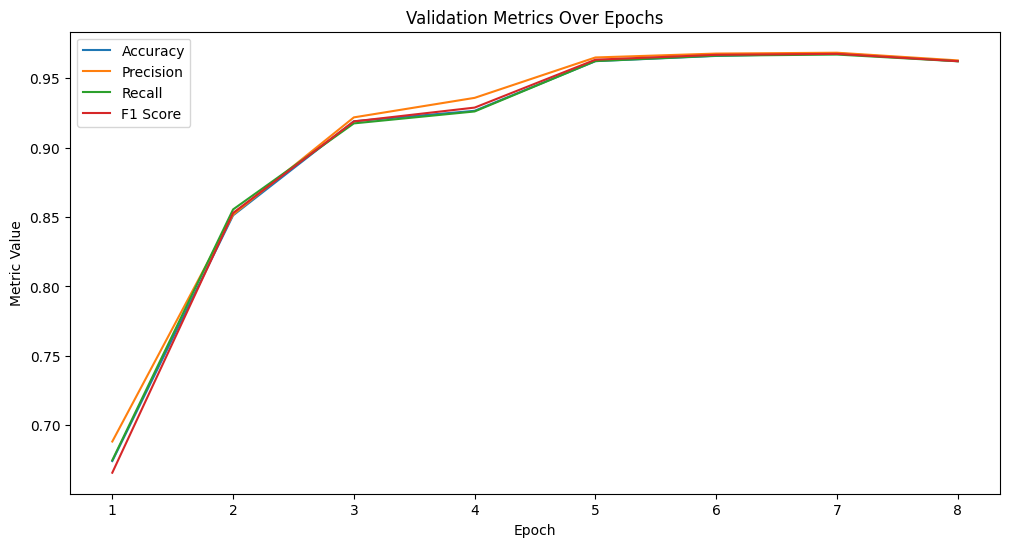

Validation Accuracy: 0.9623
Validation Precision: 0.9629
Validation Recall: 0.9622
Validation F1 Score: 0.9623
Model saved to /content/gdrive/MyDrive/ASL_QMIND_2024_2025/saved_model_inception.pth
Test Accuracy: 0.5918
Test Precision: 0.5883
Test Recall: 0.5840
Test F1: 0.5803

Classification Report for Test Set:
              precision    recall  f1-score   support

           0     0.5000    0.4444    0.4706         9
           1     0.4000    0.4000    0.4000        10
           2     0.7500    0.6667    0.7059         9
           3     0.6250    0.5000    0.5556        10
           4     0.6667    0.9091    0.7692        11

    accuracy                         0.5918        49
   macro avg     0.5883    0.5840    0.5803        49
weighted avg     0.5884    0.5918    0.5838        49



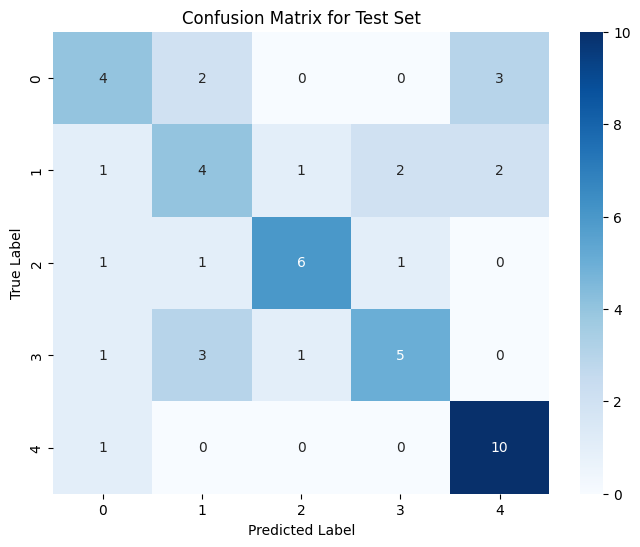

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.models as models
import torchvision.transforms as transforms
import os
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from google.colab import drive
from torch.utils.data import Dataset, DataLoader
from PIL import Image
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Mount Google Drive
drive.mount('/content/gdrive', force_remount=True)

# Define dataset paths
train_video_path = "/content/gdrive/MyDrive/ASL_QMIND_2024_2025/Frames/Train_1/"
test_video_path = "/content/gdrive/MyDrive/ASL_QMIND_2024_2025/Frames/Test_1/"

# Load train and test dataframes
train_df = pd.read_csv('/content/gdrive/MyDrive/ASL_QMIND_2024_2025/new_train_labels.csv')
test_df = pd.read_csv('/content/gdrive/MyDrive/ASL_QMIND_2024_2025/new_test_labels.csv')

# Define base image transformations
def get_transform(label=None):
    base_transform = transforms.Compose([
        transforms.RandomResizedCrop(299, scale=(0.8, 1.2)),
        transforms.RandomHorizontalFlip(),
        transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1),
        transforms.RandomAffine(degrees=10, translate=(0.1, 0.1)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    ])

    extra_augmentation = transforms.Compose([
        transforms.RandomRotation(20),
        transforms.RandomResizedCrop(299, scale=(0.7, 1.3)),
        transforms.RandomHorizontalFlip(),
        transforms.ColorJitter(brightness=0.3, contrast=0.3),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    ])

    if label in [4]:  # Apply stronger augmentation for confused classes
        return extra_augmentation
    else:
        return base_transform

class SignLanguageDataset(Dataset):
    def __init__(self, video_path, dataframe):
        self.video_path = video_path
        self.dataframe = dataframe
        self.image_paths = []
        self.labels_list = []
        self.transforms_list = []

        video_label_map = {row["video_name"].replace(".mp4", ""): row["tag"] for _, row in dataframe.iterrows()}

        for vid_name, label in video_label_map.items():
            vid_folder = os.path.join(video_path, vid_name)
            if os.path.exists(vid_folder):
                frames = sorted([f for f in os.listdir(vid_folder) if os.path.isfile(os.path.join(vid_folder, f))])
                for frame in frames:
                    frame_prefix = frame.split(".")[0]
                    if frame_prefix == vid_name:
                        self.image_paths.append(os.path.join(vid_folder, frame))
                        self.labels_list.append(label)
                        self.transforms_list.append(get_transform(label))

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        img_path = self.image_paths[idx]
        image = Image.open(img_path).convert("RGB")
        label = self.labels_list[idx]
        transform = self.transforms_list[idx]
        image = transform(image)
        return image, label

# Load datasets
train_dataset = SignLanguageDataset(train_video_path, train_df)
test_dataset = SignLanguageDataset(test_video_path, test_df)

# Split training dataset for validation
train_size = int(0.8 * len(train_dataset))
val_size = len(train_dataset) - train_size
train_dataset, val_dataset = torch.utils.data.random_split(train_dataset, [train_size, val_size])

# Create DataLoaders
train_loader = DataLoader(train_dataset, batch_size=8, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=8, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=1, shuffle=False)


# Load Pretrained ResNet50 with more fine-tuning
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = models.inception_v3(weights=models.Inception_V3_Weights.IMAGENET1K_V1, aux_logits=True)

for param in model.parameters():
    param.requires_grad = False  # Freeze all layers

# Unfreeze last 4 layers for deeper fine-tuning
for param in list(model.parameters())[-40:]:
    param.requires_grad = True

num_classes = 5
model.fc = nn.Sequential(
    nn.Linear(model.fc.in_features, 512),
    nn.ReLU(),
    nn.Dropout(0.5),
    nn.Linear(512, num_classes)
)

if hasattr(model, "AuxLogits"):
    model.AuxLogits.fc = nn.Linear(model.AuxLogits.fc.in_features, num_classes)

model = model.to(device)

# Define optimizer, scheduler, and loss function
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=5e-5)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.5)

# Training loop
num_epochs = 8
train_losses, val_accuracies, val_precisions, val_recalls, val_f1s = [], [], [], [], []

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for images, labels in train_loader:
      images, labels = images.to(device), labels.to(device)
      optimizer.zero_grad()

      outputs = model(images)
      loss = criterion(outputs.logits if isinstance(outputs, models.InceptionOutputs) else outputs, labels)
      loss.backward()
      optimizer.step()
      running_loss += loss.item()
    train_losses.append(running_loss / len(train_loader))
    scheduler.step()

    # Validation
    model.eval()
    y_true, y_pred = [], []
    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            preds = torch.argmax(outputs, dim=1)
            y_true.extend(labels.cpu().numpy())
            y_pred.extend(preds.cpu().numpy())

    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='macro')
    recall = recall_score(y_true, y_pred, average='macro')
    f1 = f1_score(y_true, y_pred, average='macro')

    val_accuracies.append(accuracy)
    val_precisions.append(precision)
    val_recalls.append(recall)
    val_f1s.append(f1)

    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {train_losses[-1]:.4f}, Acc: {accuracy:.4f}, Prec: {precision:.4f}, Rec: {recall:.4f}, F1: {f1:.4f}")

# Plot validation metrics
plt.figure(figsize=(12,6))
plt.plot(range(1, num_epochs+1), val_accuracies, label="Accuracy")
plt.plot(range(1, num_epochs+1), val_precisions, label="Precision")
plt.plot(range(1, num_epochs+1), val_recalls, label="Recall")
plt.plot(range(1, num_epochs+1), val_f1s, label="F1 Score")
plt.xlabel("Epoch")
plt.ylabel("Metric Value")
plt.legend()
plt.title("Validation Metrics Over Epochs")
plt.show()


print(f"Validation Accuracy: {val_accuracies[-1]:.4f}")
print(f"Validation Precision: {val_precisions[-1]:.4f}")
print(f"Validation Recall: {val_recalls[-1]:.4f}")
print(f"Validation F1 Score: {val_f1s[-1]:.4f}")

# Define path to save model in Google Drive
model_save_path = "/content/gdrive/MyDrive/ASL_QMIND_2024_2025/saved_model_inception.pth"

# Save model state_dict
torch.save(model.state_dict(), model_save_path)

print(f"Model saved to {model_save_path}")

# Testing with majority voting (fix)
predictions_by_video = {}
y_true_by_video = {}

with torch.no_grad():
    for img_path, (images, labels) in zip(test_dataset.image_paths, test_loader):
        images, labels = images.to(device), labels.to(device)
        output = model(images)
        pred = torch.argmax(output, dim=1).item()

        # Extract video name from frame path
        video_name = os.path.basename(img_path).split("_")[0]  # Extract "1.mp4" from "1.mp4_frame1.jpg"

        if video_name not in predictions_by_video:
            predictions_by_video[video_name] = []
            y_true_by_video[video_name] = labels.item()

        predictions_by_video[video_name].append(pred)

# Compute majority voting per video
final_predictions = {
    video: Counter(preds).most_common(1)[0][0]  # More stable majority vote
    for video, preds in predictions_by_video.items()
}

# Convert to NumPy arrays for safer evaluation
y_true_videos = np.array(list(y_true_by_video.values()))
y_pred_videos = np.array(list(final_predictions.values()))

# Compute Test Metrics
test_accuracy = accuracy_score(y_true_videos, y_pred_videos)
test_precision = precision_score(y_true_videos, y_pred_videos, average='macro')
test_recall = recall_score(y_true_videos, y_pred_videos, average='macro')
test_f1 = f1_score(y_true_videos, y_pred_videos, average='macro')

# Print metrics
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Test Precision: {test_precision:.4f}")
print(f"Test Recall: {test_recall:.4f}")
print(f"Test F1: {test_f1:.4f}")

# Print detailed class-wise metrics
from sklearn.metrics import classification_report
print("\nClassification Report for Test Set:")
print(classification_report(y_true_videos, y_pred_videos, digits=4))

# Compute and Plot Confusion Matrix
conf_matrix = confusion_matrix(y_true_videos, y_pred_videos)
unique_labels = sorted(set(y_true_videos) | set(y_pred_videos))  # Ensure correct axis labels

plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=unique_labels, yticklabels=unique_labels)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for Test Set")
plt.show()

# Free memory
torch.cuda.empty_cache()


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.models as models
import torchvision.transforms as transforms
import os
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from google.colab import drive
from torch.utils.data import Dataset, DataLoader
from PIL import Image
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Mount Google Drive
drive.mount('/content/gdrive', force_remount=True)

# Define dataset paths
train_video_path = "/content/gdrive/MyDrive/ASL_QMIND_2024_2025/Frames/Train_1/"
test_video_path = "/content/gdrive/MyDrive/ASL_QMIND_2024_2025/Frames/Test_1/"

# Load train and test dataframes
train_df = pd.read_csv('/content/gdrive/MyDrive/ASL_QMIND_2024_2025/new_train_labels.csv')
test_df = pd.read_csv('/content/gdrive/MyDrive/ASL_QMIND_2024_2025/new_test_labels.csv')

# Define base image transformations
def get_transform(label=None):
    base_transform = transforms.Compose([
        transforms.RandomResizedCrop(224, scale=(0.8, 1.2)),
        transforms.RandomHorizontalFlip(),
        transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1),
        transforms.RandomAffine(degrees=10, translate=(0.1, 0.1)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    ])

    extra_augmentation = transforms.Compose([
        transforms.RandomRotation(20),
        transforms.RandomResizedCrop(224, scale=(0.7, 1.3)),
        transforms.RandomHorizontalFlip(),
        transforms.ColorJitter(brightness=0.3, contrast=0.3),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    ])

    if label in [1, 4]:  # Apply stronger augmentation for confused classes
        return extra_augmentation
    else:
        return base_transform

class SignLanguageDataset(Dataset):
    def __init__(self, video_path, dataframe):
        self.video_path = video_path
        self.dataframe = dataframe
        self.image_paths = []
        self.labels_list = []
        self.transforms_list = []

        video_label_map = {row["video_name"].replace(".mp4", ""): row["tag"] for _, row in dataframe.iterrows()}

        for vid_name, label in video_label_map.items():
            vid_folder = os.path.join(video_path, vid_name)
            if os.path.exists(vid_folder):
                frames = sorted([f for f in os.listdir(vid_folder) if os.path.isfile(os.path.join(vid_folder, f))])
                for frame in frames:
                    frame_prefix = frame.split(".")[0]
                    if frame_prefix == vid_name:
                        self.image_paths.append(os.path.join(vid_folder, frame))
                        self.labels_list.append(label)
                        self.transforms_list.append(get_transform(label))

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        img_path = self.image_paths[idx]
        image = Image.open(img_path).convert("RGB")
        label = self.labels_list[idx]
        transform = self.transforms_list[idx]
        image = transform(image)
        return image, label

# Load datasets
train_dataset = SignLanguageDataset(train_video_path, train_df)
test_dataset = SignLanguageDataset(test_video_path, test_df)

# Split training dataset for validation
train_size = int(0.8 * len(train_dataset))
val_size = len(train_dataset) - train_size
train_dataset, val_dataset = torch.utils.data.random_split(train_dataset, [train_size, val_size])

# Create DataLoaders
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=16, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=1, shuffle=False)


# Load Pretrained ResNet50 with more fine-tuning
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = models.vgg16(weights=models.VGG16_Weights.IMAGENET1K_V1)



for param in model.parameters():
    param.requires_grad = False  # Freeze all layers

# Unfreeze last 4 layers for deeper fine-tuning
for param in list(model.parameters())[-40:]:
    param.requires_grad = True

num_classes = 5
model.classifier[6] = nn.Sequential(
    nn.Linear(model.classifier[6].in_features, 512),
    nn.ReLU(),
    nn.Dropout(0.5),
    nn.Linear(512, num_classes)
)

if hasattr(model, "AuxLogits"):
    model.AuxLogits.fc = nn.Linear(model.AuxLogits.fc.in_features, num_classes)

model = model.to(device)

# Define optimizer, scheduler, and loss function
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=5e-5)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.5)

# Training loop
num_epochs = 8
train_losses, val_accuracies, val_precisions, val_recalls, val_f1s = [], [], [], [], []

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for images, labels in train_loader:
      images, labels = images.to(device), labels.to(device)
      optimizer.zero_grad()

      outputs = model(images)
      loss = criterion(outputs, labels)
      loss.backward()
      optimizer.step()
      running_loss += loss.item()
    train_losses.append(running_loss / len(train_loader))
    scheduler.step()

    # Validation
    model.eval()
    y_true, y_pred = [], []
    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            preds = torch.argmax(outputs, dim=1)
            y_true.extend(labels.cpu().numpy())
            y_pred.extend(preds.cpu().numpy())

    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='macro')
    recall = recall_score(y_true, y_pred, average='macro')
    f1 = f1_score(y_true, y_pred, average='macro')

    val_accuracies.append(accuracy)
    val_precisions.append(precision)
    val_recalls.append(recall)
    val_f1s.append(f1)

    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {train_losses[-1]:.4f}, Acc: {accuracy:.4f}, Prec: {precision:.4f}, Rec: {recall:.4f}, F1: {f1:.4f}")

# Plot validation metrics
plt.figure(figsize=(12,6))
plt.plot(range(1, num_epochs+1), val_accuracies, label="Accuracy")
plt.plot(range(1, num_epochs+1), val_precisions, label="Precision")
plt.plot(range(1, num_epochs+1), val_recalls, label="Recall")
plt.plot(range(1, num_epochs+1), val_f1s, label="F1 Score")
plt.xlabel("Epoch")
plt.ylabel("Metric Value")
plt.legend()
plt.title("Validation Metrics Over Epochs")
plt.show()


print(f"Validation Accuracy: {val_accuracies[-1]:.4f}")
print(f"Validation Precision: {val_precisions[-1]:.4f}")
print(f"Validation Recall: {val_recalls[-1]:.4f}")
print(f"Validation F1 Score: {val_f1s[-1]:.4f}")

# Define path to save model in Google Drive
model_save_path = "/content/gdrive/MyDrive/ASL_QMIND_2024_2025/saved_model_vgg16.pth"

# Save model state_dict
torch.save(model.state_dict(), model_save_path)

print(f"Model saved to {model_save_path}")

# Testing with majority voting (fix)
predictions_by_video = {}
y_true_by_video = {}

with torch.no_grad():
    for img_path, (images, labels) in zip(test_dataset.image_paths, test_loader):
        images, labels = images.to(device), labels.to(device)
        output = model(images)
        pred = torch.argmax(output, dim=1).item()

        # Extract video name from frame path
        video_name = os.path.basename(img_path).split("_")[0]  # Extract "1.mp4" from "1.mp4_frame1.jpg"

        if video_name not in predictions_by_video:
            predictions_by_video[video_name] = []
            y_true_by_video[video_name] = labels.item()

        predictions_by_video[video_name].append(pred)

# Compute majority voting per video
final_predictions = {
    video: Counter(preds).most_common(1)[0][0]  # More stable majority vote
    for video, preds in predictions_by_video.items()
}

# Convert to NumPy arrays for safer evaluation
y_true_videos = np.array(list(y_true_by_video.values()))
y_pred_videos = np.array(list(final_predictions.values()))

# Compute Test Metrics
test_accuracy = accuracy_score(y_true_videos, y_pred_videos)
test_precision = precision_score(y_true_videos, y_pred_videos, average='macro')
test_recall = recall_score(y_true_videos, y_pred_videos, average='macro')
test_f1 = f1_score(y_true_videos, y_pred_videos, average='macro')

# Print metrics
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Test Precision: {test_precision:.4f}")
print(f"Test Recall: {test_recall:.4f}")
print(f"Test F1: {test_f1:.4f}")

# Print detailed class-wise metrics
from sklearn.metrics import classification_report
print("\nClassification Report for Test Set:")
print(classification_report(y_true_videos, y_pred_videos, digits=4))

# Compute and Plot Confusion Matrix
conf_matrix = confusion_matrix(y_true_videos, y_pred_videos)
unique_labels = sorted(set(y_true_videos) | set(y_pred_videos))  # Ensure correct axis labels

plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=unique_labels, yticklabels=unique_labels)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for Test Set")
plt.show()

# Free memory
torch.cuda.empty_cache()

# Print predicted labels in order after testing
print("Final Predicted Labels in Order:")
print(list(final_predictions.values()))


Mounted at /content/gdrive


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.models as models
import torchvision.transforms as transforms
import os
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from google.colab import drive
from torch.utils.data import Dataset, DataLoader
from PIL import Image
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Mount Google Drive
drive.mount('/content/gdrive', force_remount=True)

# Define dataset paths
train_video_path = "/content/gdrive/MyDrive/ASL_QMIND_2024_2025/Frames/Train_1/"
test_video_path = "/content/gdrive/MyDrive/ASL_QMIND_2024_2025/Frames/Test_1/"

# Load train and test dataframes
train_df = pd.read_csv('/content/gdrive/MyDrive/ASL_QMIND_2024_2025/new_train_labels.csv')
test_df = pd.read_csv('/content/gdrive/MyDrive/ASL_QMIND_2024_2025/new_test_labels.csv')

# Define base image transformations
def get_transform(label=None):
    base_transform = transforms.Compose([
        transforms.RandomResizedCrop(224, scale=(0.8, 1.2)),
        transforms.RandomHorizontalFlip(),
        transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1),
        transforms.RandomAffine(degrees=10, translate=(0.1, 0.1)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    ])

    extra_augmentation = transforms.Compose([
        transforms.RandomRotation(20),
        transforms.RandomResizedCrop(224, scale=(0.7, 1.3)),
        transforms.RandomHorizontalFlip(),
        transforms.ColorJitter(brightness=0.3, contrast=0.3),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    ])

    if label in [4]:  # Apply stronger augmentation for confused classes
        return extra_augmentation
    else:
        return base_transform

class SignLanguageDataset(Dataset):
    def __init__(self, video_path, dataframe):
        self.video_path = video_path
        self.dataframe = dataframe
        self.image_paths = []
        self.labels_list = []
        self.transforms_list = []

        video_label_map = {row["video_name"].replace(".mp4", ""): row["tag"] for _, row in dataframe.iterrows()}

        for vid_name, label in video_label_map.items():
            vid_folder = os.path.join(video_path, vid_name)
            if os.path.exists(vid_folder):
                frames = sorted([f for f in os.listdir(vid_folder) if os.path.isfile(os.path.join(vid_folder, f))])
                for frame in frames:
                    frame_prefix = frame.split(".")[0]
                    if frame_prefix == vid_name:
                        self.image_paths.append(os.path.join(vid_folder, frame))
                        self.labels_list.append(label)
                        self.transforms_list.append(get_transform(label))

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        img_path = self.image_paths[idx]
        image = Image.open(img_path).convert("RGB")
        label = self.labels_list[idx]
        transform = self.transforms_list[idx]
        image = transform(image)
        return image, label

# Load datasets
train_dataset = SignLanguageDataset(train_video_path, train_df)
test_dataset = SignLanguageDataset(test_video_path, test_df)

# Split training dataset for validation
train_size = int(0.8 * len(train_dataset))
val_size = len(train_dataset) - train_size
train_dataset, val_dataset = torch.utils.data.random_split(train_dataset, [train_size, val_size])

# Create DataLoaders
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=16, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=1, shuffle=False)


# Load Pretrained ResNet50 with more fine-tuning
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = models.mobilenet_v3_large(weights=models.MobileNet_V3_Large_Weights.IMAGENET1K_V1)



for param in model.parameters():
    param.requires_grad = False  # Freeze all layers

# Unfreeze last 4 layers for deeper fine-tuning
for param in list(model.parameters())[-40:]:
    param.requires_grad = True

num_classes = 5
model.classifier[3] = nn.Linear(model.classifier[3].in_features, num_classes)

if hasattr(model, "AuxLogits"):
    model.AuxLogits.fc = nn.Linear(model.AuxLogits.fc.in_features, num_classes)

model = model.to(device)

# Define optimizer, scheduler, and loss function
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=5e-5)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.5)

# Training loop
num_epochs = 8
train_losses, val_accuracies, val_precisions, val_recalls, val_f1s = [], [], [], [], []

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for images, labels in train_loader:
      images, labels = images.to(device), labels.to(device)
      optimizer.zero_grad()

      outputs = model(images)
      loss = criterion(outputs, labels)
      loss.backward()
      optimizer.step()
      running_loss += loss.item()
    train_losses.append(running_loss / len(train_loader))
    scheduler.step()

    # Validation
    model.eval()
    y_true, y_pred = [], []
    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            preds = torch.argmax(outputs, dim=1)
            y_true.extend(labels.cpu().numpy())
            y_pred.extend(preds.cpu().numpy())

    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='macro')
    recall = recall_score(y_true, y_pred, average='macro')
    f1 = f1_score(y_true, y_pred, average='macro')

    val_accuracies.append(accuracy)
    val_precisions.append(precision)
    val_recalls.append(recall)
    val_f1s.append(f1)

    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {train_losses[-1]:.4f}, Acc: {accuracy:.4f}, Prec: {precision:.4f}, Rec: {recall:.4f}, F1: {f1:.4f}")

# Plot validation metrics
plt.figure(figsize=(12,6))
plt.plot(range(1, num_epochs+1), val_accuracies, label="Accuracy")
plt.plot(range(1, num_epochs+1), val_precisions, label="Precision")
plt.plot(range(1, num_epochs+1), val_recalls, label="Recall")
plt.plot(range(1, num_epochs+1), val_f1s, label="F1 Score")
plt.xlabel("Epoch")
plt.ylabel("Metric Value")
plt.legend()
plt.title("Validation Metrics Over Epochs")
plt.show()


print(f"Validation Accuracy: {val_accuracies[-1]:.4f}")
print(f"Validation Precision: {val_precisions[-1]:.4f}")
print(f"Validation Recall: {val_recalls[-1]:.4f}")
print(f"Validation F1 Score: {val_f1s[-1]:.4f}")

# Define path to save model in Google Drive
model_save_path = "/content/gdrive/MyDrive/ASL_QMIND_2024_2025/saved_model_mobilenet.pth"

# Save model state_dict
torch.save(model.state_dict(), model_save_path)

print(f"Model saved to {model_save_path}")

# Testing with majority voting (fix)
predictions_by_video = {}
y_true_by_video = {}

with torch.no_grad():
    for img_path, (images, labels) in zip(test_dataset.image_paths, test_loader):
        images, labels = images.to(device), labels.to(device)
        output = model(images)
        pred = torch.argmax(output, dim=1).item()

        # Extract video name from frame path
        video_name = os.path.basename(img_path).split("_")[0]  # Extract "1.mp4" from "1.mp4_frame1.jpg"

        if video_name not in predictions_by_video:
            predictions_by_video[video_name] = []
            y_true_by_video[video_name] = labels.item()

        predictions_by_video[video_name].append(pred)

# Compute majority voting per video
final_predictions = {
    video: Counter(preds).most_common(1)[0][0]  # More stable majority vote
    for video, preds in predictions_by_video.items()
}

# Convert to NumPy arrays for safer evaluation
y_true_videos = np.array(list(y_true_by_video.values()))
y_pred_videos = np.array(list(final_predictions.values()))

# Compute Test Metrics
test_accuracy = accuracy_score(y_true_videos, y_pred_videos)
test_precision = precision_score(y_true_videos, y_pred_videos, average='macro')
test_recall = recall_score(y_true_videos, y_pred_videos, average='macro')
test_f1 = f1_score(y_true_videos, y_pred_videos, average='macro')

# Print metrics
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Test Precision: {test_precision:.4f}")
print(f"Test Recall: {test_recall:.4f}")
print(f"Test F1: {test_f1:.4f}")

# Print detailed class-wise metrics
from sklearn.metrics import classification_report
print("\nClassification Report for Test Set:")
print(classification_report(y_true_videos, y_pred_videos, digits=4))

# Compute and Plot Confusion Matrix
conf_matrix = confusion_matrix(y_true_videos, y_pred_videos)
unique_labels = sorted(set(y_true_videos) | set(y_pred_videos))  # Ensure correct axis labels

plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=unique_labels, yticklabels=unique_labels)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for Test Set")
plt.show()

# Free memory
torch.cuda.empty_cache()


In [ ]:
### Google Colab Notebook for SHAP Analysis on Saved VGG16 Model

# Install necessary libraries
#!pip install shap torch torchvision matplotlib numpy pandas

import pandas as pd
import cv2
import seaborn as sns
from torch.utils.data import Dataset, DataLoader
from PIL import Image
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import shap
import torch
import torchvision.models as models
import torchvision.transforms as transforms
import numpy as np
import matplotlib.pyplot as plt
import os
from PIL import Image
from google.colab import drive
from collections import Counter

# Mount Google Drive
drive.mount('/content/gdrive', force_remount=True)

# Define model path
model_save_path = "/content/gdrive/MyDrive/ASL_QMIND_2024_2025/saved_model_vgg16.pth"

# Load the pretrained VGG16 model
model = models.vgg16(weights=models.VGG16_Weights.IMAGENET1K_V1)
num_classes = 5
model.classifier[6] = torch.nn.Sequential(
    torch.nn.Linear(model.classifier[6].in_features, 512),
    torch.nn.ReLU(),
    torch.nn.Dropout(0.5),
    torch.nn.Linear(512, num_classes)
)

# Load saved weights
model.load_state_dict(torch.load(model_save_path, map_location=torch.device("cuda" if torch.cuda.is_available() else "cpu")))
model.eval()
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

print("Model loaded successfully.")

# Define test dataset path and load labels
test_video_path = "/content/gdrive/MyDrive/ASL_QMIND_2024_2025/Frames/Test_1/"
test_df = pd.read_csv('/content/gdrive/MyDrive/ASL_QMIND_2024_2025/new_test_labels.csv')

# Define transformations
def get_transform():
    return transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    ])

# Custom dataset class
class SignLanguageDataset(Dataset):
    def __init__(self, video_path, dataframe):
        self.video_path = video_path
        self.dataframe = dataframe
        self.image_paths = []
        self.labels_list = []
        self.transforms = get_transform()

        video_label_map = {row["video_name"].replace(".mp4", ""): row["tag"] for _, row in dataframe.iterrows()}

        for vid_name, label in video_label_map.items():
            vid_folder = os.path.join(video_path, vid_name)
            if os.path.exists(vid_folder):
                frames = sorted(os.listdir(vid_folder))
                for frame in frames:
                    self.image_paths.append(os.path.join(vid_folder, frame))
                    self.labels_list.append(label)

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        img_path = self.image_paths[idx]
        image = Image.open(img_path).convert("RGB")
        label = self.labels_list[idx]
        image = self.transforms(image)
        return image, label, img_path

# Load test dataset
test_dataset = SignLanguageDataset(test_video_path, test_df)
print(f"Loaded {len(test_dataset)} test images.")

# Initialize SHAP explainer
explainer = shap.GradientExplainer(model, torch.zeros((1, 3, 224, 224)).to(device))

# Select a sample test image
sample_img, label, img_path = test_dataset[0]  # Change index for different images
sample_img = sample_img.unsqueeze(0).to(device)

# Compute SHAP values
shap_values = explainer.shap_values(sample_img)
shap_values = np.array(shap_values)  # Convert to NumPy array

# Aggregate SHAP values correctly (reduce over classes and channels)
shap_values_img = np.mean(shap_values, axis=(0, 1, 2))  # Ensures a (224, 224) array

# Normalize SHAP values for visualization
shap_values_img = (shap_values_img - shap_values_img.min()) / (shap_values_img.max() - shap_values_img.min())

# Convert original image to NumPy for overlay
original_img = np.array(Image.open(img_path).convert("RGB"))

# Plot SHAP heatmap overlayed on original image
plt.figure(figsize=(8, 6))
plt.imshow(original_img)
plt.imshow(shap_values_img, cmap='jet', alpha=0.5)  # SHAP overlay
plt.title(f"SHAP Heatmap for Sample Image (Label: {label})")
plt.axis("off")
plt.colorbar()
plt.show()


# Global SHAP Analysis on Multiple Images
num_samples = 10
sample_indices = np.random.choice(len(test_dataset), num_samples, replace=False)
sample_images = [test_dataset[i][0].unsqueeze(0).to(device) for i in sample_indices]
sample_images_tensor = torch.cat(sample_images, dim=0)

# Compute SHAP values for multiple images, ensuring correct format
shap_values_multi = [explainer.shap_values(img.unsqueeze(0)) for img in sample_images_tensor]
shap_values_multi = np.array(shap_values_multi)

# Print SHAP values shape for debugging
print(f"shap_values_multi shape: {shap_values_multi.shape}")
print(f"sample_images_tensor shape: {sample_images_tensor.shape}")

# Ensure correct shape for summary plot
shap_values_multi = np.squeeze(shap_values_multi)
if shap_values_multi.shape[0] > 1:
    shap_values_multi = shap_values_multi[0]  # Select the first class if multi-class

# Generate SHAP summary plot
shap.summary_plot(shap_values_multi, sample_images_tensor.cpu().numpy(), show=True)

print("SHAP analysis completed successfully!")
